In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***2. Load the dataset.***


---






In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IBM/Churn_Modelling.csv")

In [23]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


***3. Perform Below Visualizations.***


---





    ● Univariate Analysis

    ● Bi - Variate Analysis

    ● Multi - Variate Analysis 


---







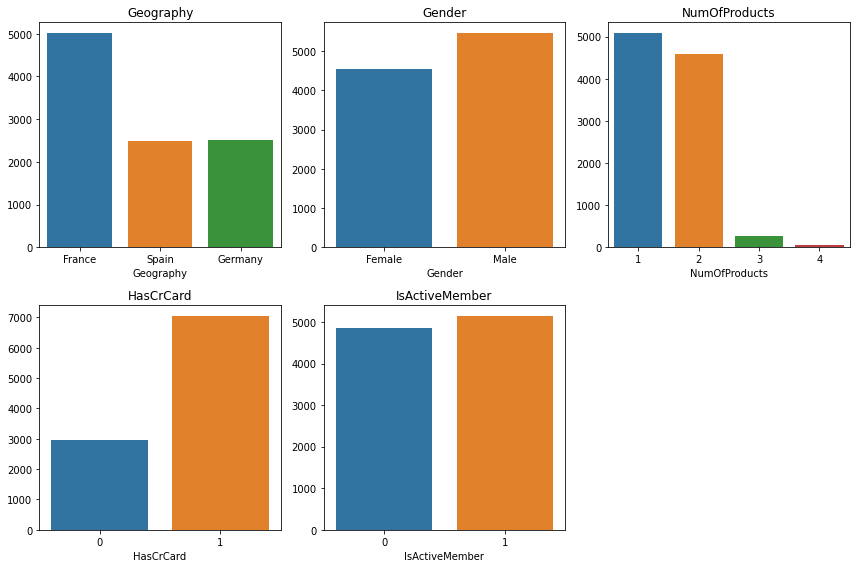

In [24]:
fig, axes = plt.subplots(2,3,figsize=(12,8))
valid_col =['Geography', 'Gender',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember']
for i, ax in enumerate(axes.flatten()):
    if i == 5:
        ax.axis('off')
        break
    sns.countplot(data=df,x=valid_col[i],ax=ax)
    ax.set_ylabel(None)
    ax.set_title(label=valid_col[i])
plt.tight_layout()

Observation from Univariate Analysis

    ● Most of the Customers are located in france

    ● Male customers are higher than that of Female customers

    ● Active and In Active members are more or less equal

    ● Most of the Customers own a credit card

    ● Most of the Customers atleast use 1 or 2 products from the bank

Bivariate Analysis to understand each categorical variables relation with target variable (Exited)


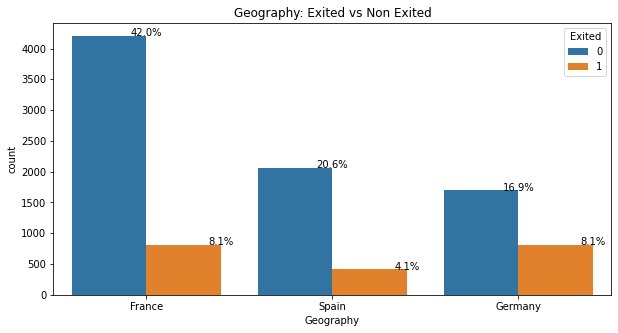

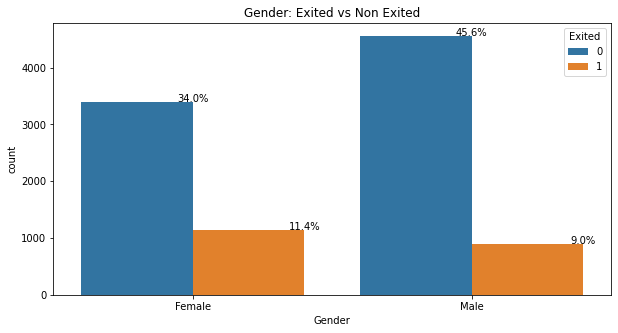

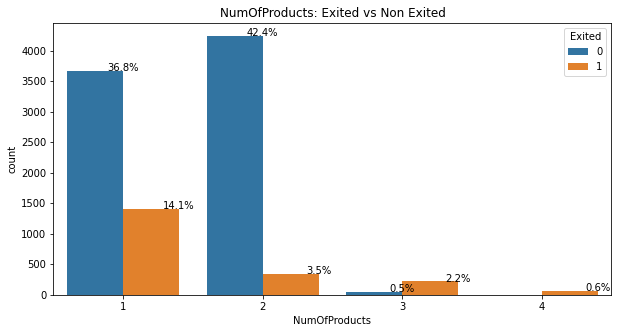

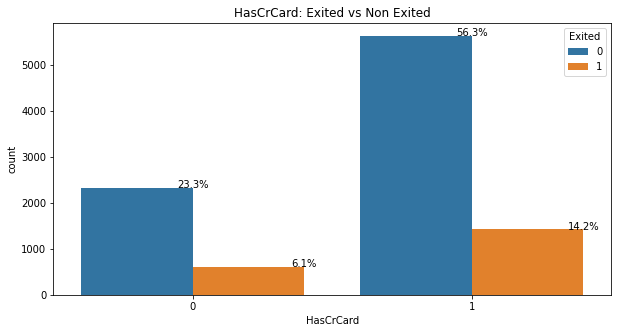

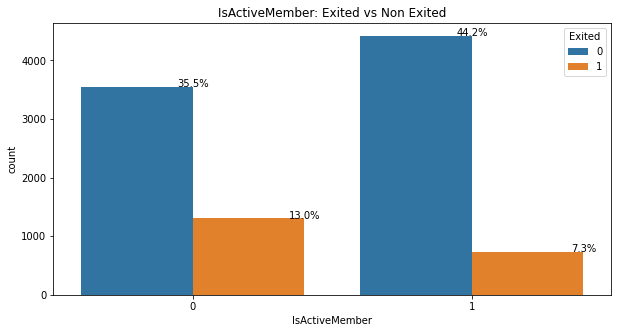

In [25]:
total=float(len(df))
Excepted_col=['Tenure','Age','CreditScore','Balance',"EstimatedSalary"]
Accepted_col=['Geography', 'Gender','NumOfProducts', 'HasCrCard', 'IsActiveMember']
for column in Accepted_col:
    fig, ax = plt.subplots(figsize=(10,5))
    sns.countplot(data=df,x=column,hue='Exited',ax=ax)
    ax.set_title(column+': Exited vs Non Exited')
    ax.set_ylabel('count')
    for i in ax.patches:
        percent = '{:.1f}%'.format(100 * i.get_height()/total)
        x=i.get_x() + i.get_width()
        y=i.get_height()
        ax.annotate(percent,(x,y),ha='center')
    plt.show()

**Observation from Bivariate Analysis - Catergorical**

* 42% People who are located in France havent exited compared to other countries.

* The churn % of Females are higher than Males
* Customers who use more than 2 products are less possible to exit
* Most of the customers who exit are inactive members
* Most of the customers who exit have a credit card

*Bivariate Analysis to understand each Numerical variables relation with target variable (Exited)*

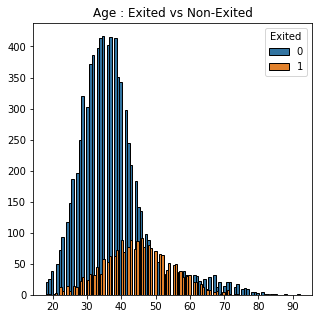

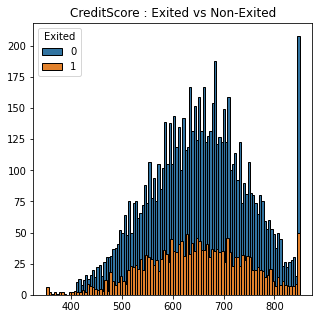

In [26]:
df_exited=df[df['Exited']==1]
df_not_exited=df[df['Exited']==0]
Excepted_col=['Age','CreditScore']
for column in Excepted_col:
    plt.figure(figsize=(5,5))
    plt.hist(x=column,bins=100,data=df_not_exited,edgecolor='black',color='#3274a1')
    plt.hist(x=column,bins=100,data=df_exited,edgecolor='black',color='#e1812c')
    plt.title(column+' : Exited vs Non-Exited')
    plt.legend([0,1],title='Exited')

**4. Perform descriptive statistics on the dataset**

---



In [27]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


[]

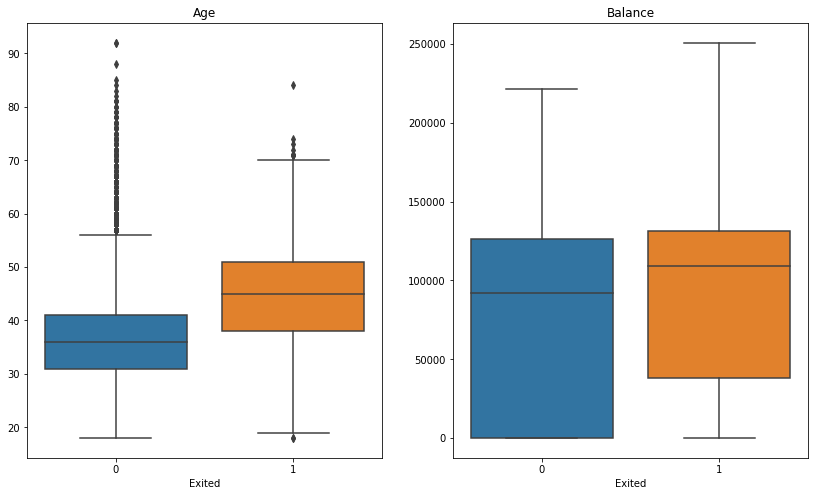

In [28]:
fig, axes = plt.subplots(1,2,figsize=(14,8))
valid_col = ['Age', 'Balance']
for i, ax in enumerate(axes.flatten()):
    if i == 5:
        ax.axis('off')
        break
    sns.boxplot(x='Exited', y=valid_col[i], data=df, ax=ax)
    ax.set_ylabel(None)
    ax.set_title(label=valid_col[i])
plt.plot()

From the below scatterplot, we can clearly see that people with age above 40 have exited more.



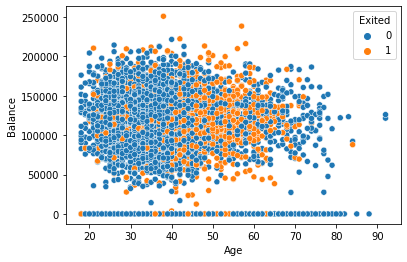

In [29]:
sns.scatterplot(data=df, x="Age", y="Balance", hue="Exited")


Looking at the Value counts for the Target Variable


In [30]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

From the below barchart, we can see the imabalance clearly.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


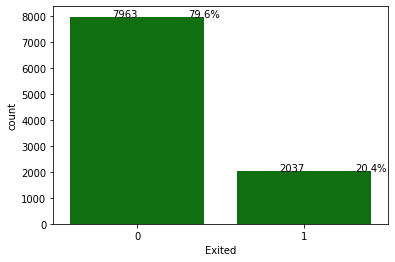

In [31]:
total=float(len(df))
#df_exited=df[df['Exited']==1]
#df_exited['Gender'].value_counts()
ax=sns.countplot(df['Exited'],color="Green")
for p in ax.patches:
        percent = '{:.1f}%'.format(100 * p.get_height()/total)
        x=p.get_x() + p.get_width()
        y=p.get_height()
        ax.annotate(percent,(x,y),ha='center')
        ax.annotate(y, (x - + p.get_width() +0.25, y+0.01))
plt.show()

In [32]:
df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender'],drop_first=True)
df_encoded.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
5,6,15574012,Chu,645,44,8,113755.78,2,1,0,149756.71,1,0,1,1
6,7,15592531,Bartlett,822,50,7,0.00,2,1,1,10062.80,0,0,0,1
7,8,15656148,Obinna,376,29,4,115046.74,4,1,0,119346.88,1,1,0,0
8,9,15792365,He,501,44,4,142051.07,2,0,1,74940.50,0,0,0,1
9,10,15592389,H?,684,27,2,134603.88,1,1,1,71725.73,0,0,0,1


***Scale the independent variables***


---


Using Min-Max Scaler, scaling the numerical variables.



In [37]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

***Check for Categorical columns and perform encoding.***


---









In [38]:
df_encoded[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])

Checking the values after encoding and scaling.

In [34]:
for col in df_encoded:
    print(f'{col}: {df_encoded[col].unique()}')

RowNumber: [    1     2     3 ...  9998  9999 10000]
CustomerId: [15634602 15647311 15619304 ... 15584532 15682355 15628319]
Surname: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472

**Split the data into dependent and independent variables.**

---







In [35]:
X = df_encoded.drop('Exited',axis='columns')
y = df_encoded['Exited']

***Find the outliers and replace the outliers***

---

[]

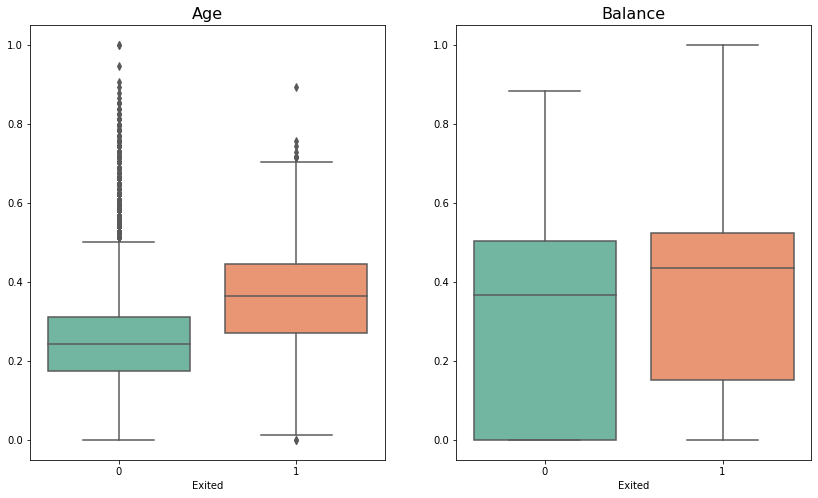

In [39]:
fig, axes = plt.subplots(1,2,figsize=(14,8))

high_correlation = ['Age', 'Balance']

for i, ax in enumerate(axes.flatten()):
    if i == 5:
        ax.axis('off')
        break
    sns.boxplot(x='Exited', y=high_correlation[i], data=df_encoded, ax=ax, palette=sns.color_palette('Set2', 2))
    ax.set_ylabel(None)
    ax.set_title(label=high_correlation[i], fontsize=16, fontweight='light')
plt.plot()

*As we can see there are outliers at both the ends of the Age boxplot. So removing them from our dataset*

*Here we remove the data points which lies above Q75 + 1.5 IQR and below Q25+ 1.5IQR .*

In [40]:
v_fraud = df_encoded[df_encoded['Exited']==1]['Age']

q75 = np.percentile(v_fraud, 75)
q25 = np.percentile(v_fraud, 25)
iqr = q75 - q25

v_lower, v_upper = q25-1.5*iqr, q75+1.5*iqr
outliers = [x for x in v_fraud if x > v_upper or x < v_lower]

print(str(len(outliers))+' '+str('Age')+' fraud outliers: '+str(outliers)+'\n')

df_bal_smote = df_encoded.drop(df_encoded.index[df_encoded['Age'].isin(outliers) & 
                                 df_encoded['Exited']==1])

13 Age fraud outliers: [0.7432432432432431, 0.0, 0.7162162162162161, 0.7567567567567566, 0.7162162162162161, 0.8918918918918917, 0.7162162162162161, 0.7162162162162161, 0.7162162162162161, 0.7162162162162161, 0.7297297297297297, 0.0, 0.7162162162162161]



***Split the data into training and testing***

---

In [42]:
X = df_bal_smote.drop('Exited',axis='columns')
y = df_bal_smote['Exited']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)